In [1]:
using DelimitedFiles
using Plots
using Dierckx

In [2]:
pyplot()

Plots.PyPlotBackend()

In [3]:
vn_xi_murca_n = readdlm("../output_data/murca_n_vn_over_xi.dat", Float64, comments=true)
vp_xi_murca_n = readdlm("../output_data/murca_n_vp_over_xi.dat", Float64, comments=true)
vn_xi_murca_p = readdlm("../output_data/murca_p_vn_over_xi.dat", Float64, comments=true)
vp_xi_murca_p = readdlm("../output_data/murca_p_vp_over_xi.dat", Float64, comments=true);

In [28]:
Rrate_murca_p = readdlm("../output_data/Rrate_murca_p_SFnp_nonzeroT_logxi_0.1.dat", Float64, comments=true);

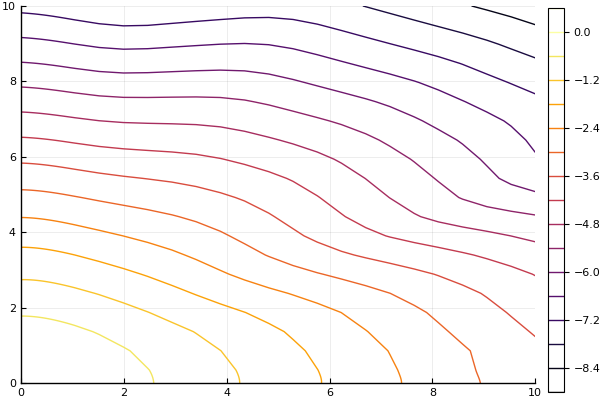

In [29]:
contour(vn_xi_murca_p[:,1], vp_xi_murca_p[:,1], log10.(Rrate_murca_p .+ 1e-314))

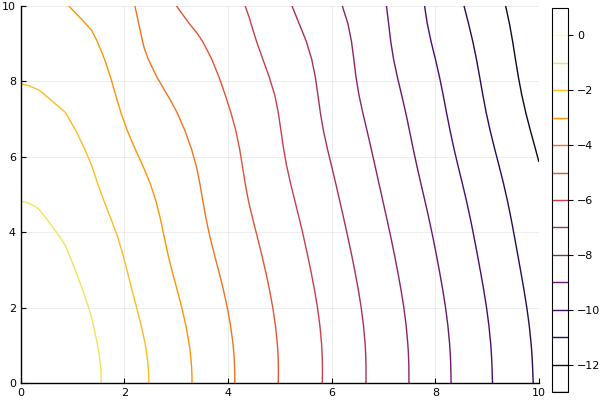

In [27]:
Rrate_murca_n = readdlm("../output_data/Rrate_murca_n_SFnp_nonzeroT_logxi_0.1.dat", Float64, comments=true);
contour(vn_xi_murca_n[:,1], vp_xi_murca_n[:,1], log10.(Rrate_murca_n .+ 1e-314))

In [226]:
Rrate_murca_p_spls = [Spline2D(vn_xi_murca_n[:,1], vp_xi_murca_n[:,1], 
        readdlm("../output_data/Rrate_murca_p_SFnp_nonzeroT_logxi_$(logxi).dat", Float64, comments=true), kx=1, ky=1)
    for logxi=logxis];

In [231]:
Rrate_murca_p_spls[(logxis .> (x-0.1)) .& (logxis .<= x)][1]

Spline2D([0.0, 0.0, 0.0175439, 0.0350877, 0.0526316, 0.0701754, 0.0877193, 0.105263, 0.122807, 0.140351  …  5.93721, 6.44506, 6.95291, 7.46076, 7.96861, 8.47645, 8.9843, 9.49215, 10.0, 10.0], [0.0, 0.0, 0.0526316, 0.105263, 0.157895, 0.210526, 0.263158, 0.315789, 0.368421, 0.421053  …  6.23269, 6.7036, 7.17452, 7.64543, 8.11634, 8.58726, 9.05817, 9.52909, 10.0, 10.0], [0.976736, 0.975786, 0.973233, 0.967927, 0.959564, 0.947965, 0.933007, 0.914593, 0.892661, 0.867226  …  3.55475e-30, 2.9134e-31, 1.0405e-32, 4.83241e-35, 1.31321e-37, 3.43387e-40, 9.26818e-43, 2.36341e-45, 6.27817e-48, 2.60561e-50], 1, 1, 0.0)

In [266]:
function Rrate_murca_p_intp(vn, vp, xi)
    logxi = log10(xi)
    idx1 = (logxis .> (logxi-0.1)) .& (logxis .<= logxi)
    idx2 = (logxis .< (logxi+0.1)) .& (logxis .>= logxi)

    if logxi<0.0 || logxi>2.0 || vn>max(vn_xi_murca_p...) || vp>max(vp_xi_murca_p...)
        return 0.0
    
    elseif idx1 == idx2
        return Rrate_murca_p_spls[idx1][1](vn, vp)
        
    else 
        logxi1 = logxis[idx1][1]
        logxi2 = logxis[idx2][1]
        @show logxi1, logxi2
        R1 = Rrate_murca_p_spls[idx1][1](vn, vp)
        R2 = Rrate_murca_p_spls[idx2][1](vn, vp)
        
        #return R1 + (R2-R1)/(logxi2-logxi1) * (logxi - logxi1)
        return R1 + (R2-R1)/(exp10(logxi2)-exp10(logxi1)) * (xi - exp10(logxi1))
    end
end

Rrate_murca_p_intp (generic function with 1 method)

In [267]:
Rrate_murca_p_intp(0.2, 0.2, 2.)

(logxi1, logxi2) = (0.3, 0.4)


0.9067384814750743

In [265]:
Rrate_murca_p_spls[4](0.2,0.2)

0.9072721025017599

In [259]:
log10(17.)

1.2304489213782739